<a href="https://colab.research.google.com/github/lilasu086/Individual_Coding_Project/blob/main/NeuralNetwork_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART A: Convolutional Neural Networks **(Using Keras)**

# Dataset

Utilize the [Fashion MNIST dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist) for this part of the assignment. This dataset is a good baseline for exploring convolutional models due to its simplicity and the variety of fashion items represented in the images.

# Question 1: Data Augmentation (10 Points)

1. Use the [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class in Keras to implement real-time data augmentation. Apply at least three augmentation techniques (e.g., rotation, zoom, horizontal flipping) to increase the diversity of your training dataset. Select reasonable values for the parameters used for data augmentation.

2. Make sure you "pre-process" the data properly to be used by the model in the next question.

3. Display a few example images from the dataset to demonstrate that data augmentation is working properly.

4. Briefly explain how each chosen augmentation technique can help improve model generalization.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Your Python Code goes here...
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Shape of training data:
(60000, 28, 28)
(60000,)
Shape of test data:
(10000, 28, 28)
(10000,)


In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Check the maximum and minimum value
print('max value of X_train: ' + str(X_train.max()))
print('max value of X_test: ' + str(X_test.max()))
print('max value of X_train: ' + str(X_train.min()))
print('max value of X_test: ' + str(X_test.min()))

max value of X_train: 255
max value of X_test: 255
max value of X_train: 0
max value of X_test: 0


In [ ]:
# Transform the data types to do the type transformation
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# Check the maximum and minimum value
print('max value of X_train: ' + str(X_train.max()))
print('max value of X_test: ' + str(X_test.max()))
print('max value of X_train: ' + str(X_train.min()))
print('max value of X_test: ' + str(X_test.min()))

max value of X_train: 1.0
max value of X_test: 1.0
max value of X_train: 0.0
max value of X_test: 0.0


In [ ]:
# Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Data Augmentation
data_aug = ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
X_train_generator = data_aug.flow(
    X_train,
    y_train,
    batch_size=32,
    shuffle=False,
) #set shuffle = False to let the sequence same with the original image sequence

In [ ]:
X_train[0].shape #first image

(28, 28, 1)

In [ ]:
X_train_generator[0][0].shape #first batch

(32, 28, 28, 1)

In [ ]:
X_train_generator[0][0][0].shape #first image

(28, 28, 1)

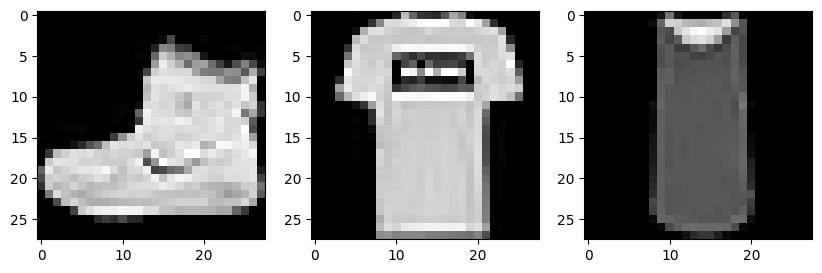

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1,3, 1)
plt.imshow(X_train[0], cmap='gray')
plt.subplot(1,3, 2)
plt.imshow(X_train[1], cmap='gray')
plt.subplot(1,3, 3)
plt.imshow(X_train[2], cmap='gray')

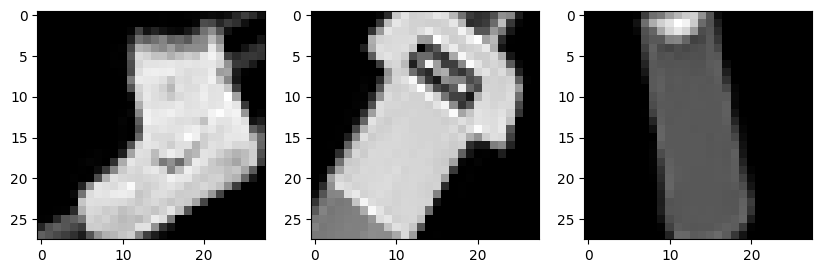

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1,3, 1)
plt.imshow(X_train_generator[0][0][0], cmap='gray')
plt.subplot(1,3, 2)
plt.imshow(X_train_generator[0][0][1], cmap='gray')
plt.subplot(1,3, 3)
plt.imshow(X_train_generator[0][0][2], cmap='gray')

**Answer**:

For data augmentation aimed at enhancing my model's robustness, I incorporate rotation, zoom, and horizontal flipping to augment my training dataset.

Rotation: I apply rotation with an angle of 45 degrees. Rotating the images assists in improving the model's ability to generalize to images captured at various angles, enhancing its robustness to orientation variations in the depicted objects.

Zoom: I introduce zooming with a factor of 0.2. Zooming replicates the scenario of objects being either closer to or farther away from the camera, thereby fortifying the model against fluctuations in object scales present in the images.

Horizontal Flipping: I enable horizontal flipping. This operation mirrors the image horizontally, mimicking a view from the opposite side. It aids in fostering the model's resilience against horizontal reflections or flips.

In summary, these augmentation strategies aim to diversify the training dataset, facilitating superior generalization of the model to unseen data and bolstering its adaptability to a range of transformations and variations in input images.

# Question 2: CNN architecture (15 Points)

Design and implement a CNN architecture that includes the following elements:

1. At least two convolutional layers with different filter sizes, including appropriate non-linearities.
2. Dropout layer(s) to reduce overfitting.
3. Batch normalization layer(s).
4. At least one global average pooling layer instead of flattening the data.

Compile and summarize your model, explaining the rationale behind your architectural and other hyper-parameter choices. Report the training and test accuracies of your model. You should be able to achieve a test accuracy beyond 85%. The experiment should not take more than 5 minutes when using GPU.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

# Your Python code goes here...
model = Sequential()
model.add(Conv2D(16, kernel_size=3, activation='relu',input_shape=(28, 28, 1), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(2))

model.add(Conv2D(32, kernel_size=5, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, kernel_size=5, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(2))

model.add(GlobalAveragePooling2D()) # like flatten function
model.add(Dense(10, activation='softmax'))

In [ ]:
#from torchinfo import summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        12832     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        1

In [ ]:
from keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train_generator[0][0].shape

(32, 28, 28, 1)

In [ ]:
X_train_reshape = X_train_generator[0][0][0]

In [ ]:
X_train_generator[0][1].shape

(32, 10)

In [ ]:
X_train_generator[0][1][0].shape

(10,)

In [ ]:
y_train_reshape = X_train_generator[0][1][0]

In [ ]:
X_train_generator.x.shape
# Data augmentation just alters the original images to introduce greater variation into the entire dataset
# would not increase the dataset volums

(60000, 28, 28, 1)

In [ ]:
X_train_generator.y.shape

(60000, 10)

In [ ]:
model.fit(X_train_generator.x, X_train_generator.y, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 16s 6ms/step - loss: 0.4350 - accuracy: 0.8409 - val_loss: 0.3491 - val_accuracy: 0.8691
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3159 - accuracy: 0.8843 - val_loss: 0.3570 - val_accuracy: 0.8752
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2896 - accuracy: 0.8936 - val_loss: 0.4219 - val_accuracy: 0.8540
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2695 - accuracy: 0.9015 - val_loss: 0.4161 - val_accuracy: 0.8599
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2552 - accuracy: 0.9066 - val_loss: 0.4215 - val_accuracy: 0.8533
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2461 - accuracy: 0.9100 - val_loss: 0.2743 - val_accuracy: 0.9011
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2314 - accuracy: 0.9144 - val_loss: 0.2973 - val_accuracy

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2548 - accuracy: 0.9157


[0.2548252046108246, 0.9157000184059143]

**Answer:**

For the CNN architecture implementation, I designed three convolutional layers.

In the first layer, I configured 16 filters with 3x3 kernels and applied same padding. The second layer consisted of 32 filters with 5x5 kernels and same padding, while the last layer had 64 filters with 5x5 kernels and same padding. By utilizing same padding, I aimed to maintain the output feature size identical to the input, ensuring no loss of spatial information.

Considering the hierarchical nature of feature extraction in CNNs, I progressively increased the number of filters in deeper layers. Early layers primarily learn low-level features, while deeper layers detect high-level features by combining low-level ones. This rationale guided my decision to augment the number of filters as the network deepens.

Moreover, I employed varying kernel sizes across layers to enable the model to capture features at multiple scales and levels of abstraction. Smaller kernel sizes in the initial layer aid in capturing local details and textures, while larger kernel sizes in subsequent layers facilitate the extraction of larger-scale shapes and structural features.

After each convolutional layer, I applied the ReLU activation function to introduce non-linearity, allowing the model to learn more complex relationships between features. Additionally, I incorporated batch normalization and dropout layers to enhance generalization and mitigate overfitting risks.

To down-sample the feature maps, I utilized max pooling. The sequence of operations—batch normalization, dropout, and pooling—was chosen to maximize information preservation within the feature maps, while effectively managing model complexity and preventing overfitting.

I opted for the Adam optimizer over SGD due to its adaptive learning rate mechanism, which adjusts the learning rate individually for each parameter based on past gradients. This adaptive nature facilitates handling sparse gradients and varying magnitudes across parameters, making it particularly suitable for optimizing complex models.

Regarding model performance, the training accuracy reached 92.3%, while the test accuracy attained 91.6%. The close alignment between these accuracies suggests a well-generalized model, indicating that it can effectively classify unseen data.

# Question 3: Hyperparameter Tuning and Evaluation (25 Points)

1. Implement a hyperparameter tuning strategy using `WandB`. You will perform a grid search to find the optimal `batch size in ([32, 64, 128])` and `learning rate in ([1e-2, 1e-3, 1e-4])`. You will run each experiment for 10 epochs with an early stopping of `patience=3`.
Here are some resources that will help you with your task:
- https://docs.wandb.ai/guides/sweeps/define-sweep-configuration
- https://docs.wandb.ai/guides/sweeps/add-w-and-b-to-your-code
- Sweep options: https://docs.wandb.ai/guides/sweeps/sweep-config-keys
- Use `WandbMetricsLogger` to automatically log the model performance to WandB: https://docs.wandb.ai/tutorials/keras
- Consult the following link for creating a confusion matrix in WandB: https://wandb.ai/wandb/plots/reports/Confusion-Matrix-Usage-and-Examples--VmlldzozMDg1NTM
- use `wandb.run.summary` for reporting the test accuracy of the model.
- **(Note: Do NOT use YAML files for this assignment. Use the "Python script or Jupyter notebook" option)**

2. For each experiment, you will log the train and validation accuracies and losses for each epoch. You will also log the final test accuracy and confusion matrix. Provide a detailed analysis of your sweep results by looking at the resulting WandB dashboard (e.g., the "parameter importance" panel).

3. Below, include a **PUBLICLY** available link to a report of your sweep: https://docs.wandb.ai/guides/reports/collaborate-on-reports

4. Compare the results with those obtained from the simpler model in the earlier question and discuss any insights or surprises in your findings.

Reference

1. Hyperparameter Sweeps with W&B : https://colab.research.google.com/drive/1gKixa6hNUB8qrn1CfHirOfTEQm0qLCSS#scrollTo=aIhxl7glaJ5k

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [ ]:
import torch
gpu_available = torch.cuda.is_available()
gpu_available

True

In [ ]:
X_train_generator.x.shape

(60000, 28, 28, 1)

In [ ]:
X_train_generator.y.shape

(60000, 10)

In [ ]:
X_train.shape

(48000, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbMetricsLogger

label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

wandb.login()

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_generator.x, X_train_generator.y, test_size=0.2, random_state=42)


# Your Python code goes here...


# Step 1: Define your sweep configs here
sweep_config = {
    'method': 'grid',
    'parameters': {
        'epochs': {
            'values': [10]
            },
        'batch_size': {
            'values': [32, 64, 128]
        },
        'learning_rate': {
            'values': [1e-2, 1e-3, 1e-4]
        }
    }
}

# Step 2: Write a function that contains the code necessary for running a single experiment.
def main():

    # initialize WandB
    run = wandb.init()

    # 2.1 Define the model
    model = Sequential()
    model.add(Conv2D(16, kernel_size=3, activation='relu',input_shape=(28, 28, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(2))

    model.add(Conv2D(32, kernel_size=5, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(2))

    model.add(Conv2D(64, kernel_size=5, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(2))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(10, activation='softmax'))


    # 2.2 Compile the model
    adam = Adam(learning_rate=wandb.config.learning_rate)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

    # 2.3 fit the model. Use callbacks to log metrics to WandB
    model.fit(X_train, y_train, epochs=wandb.config.epochs, batch_size=wandb.config.batch_size, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3), WandbMetricsLogger(log_freq=10)])

    # 2.4 Log the test accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    wandb.run.summary["test_accuracy"] = test_accuracy

    # 2.5 Log the confusion matrix
    wandb.log({"conf_mat" : wandb.plot.confusion_matrix(probs=None,
                        y_true=np.argmax(y_test, axis=1), preds=np.argmax(model.predict(X_test), axis=1),
                        class_names=label_names)})


# Step 3: Initialize sweep by passing in the config.
sweep_id = wandb.sweep(sweep=sweep_config, project="Assignment2_6")

# Step 4: Start sweep job.
wandb.agent(sweep_id, function=main)
# 9389723ee9f53bf49bbaccfb75516b4318c47851

Create sweep with ID: ibjtthog
Sweep URL: https://wandb.ai/lilasu/Assignment2_6/sweeps/ibjtthog


wandb: Agent Starting Run: prini1ly with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.01


Epoch 1/10
1500/1500 [==============================] - 12s 6ms/step - loss: 0.4494 - accuracy: 0.8352 - val_loss: 0.5805 - val_accuracy: 0.7827
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3280 - accuracy: 0.8804 - val_loss: 0.3624 - val_accuracy: 0.8713
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2963 - accuracy: 0.8911 - val_loss: 0.3172 - val_accuracy: 0.8877
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2756 - accuracy: 0.8987 - val_loss: 0.4063 - val_accuracy: 0.8483
Epoch 5/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2598 - accuracy: 0.9038 - val_loss: 0.3270 - val_accuracy: 0.8915
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2500 - accuracy: 0.9090 - val_loss: 0.2841 - val_accuracy: 0.8971
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2391 - accuracy: 0.9125 - val_loss: 0.2507 - val_ac

wandb: Agent Starting Run: k0t8uwph with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Epoch 1/10
1500/1500 [==============================] - 12s 6ms/step - loss: 0.4387 - accuracy: 0.8427 - val_loss: 0.3589 - val_accuracy: 0.8665
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3054 - accuracy: 0.8884 - val_loss: 0.2828 - val_accuracy: 0.8962
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2685 - accuracy: 0.9035 - val_loss: 0.3612 - val_accuracy: 0.8753
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2503 - accuracy: 0.9087 - val_loss: 0.2825 - val_accuracy: 0.8991
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2337 - accuracy: 0.9139 - val_loss: 0.2895 - val_accuracy: 0.8983
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2208 - accuracy: 0.9192 - val_loss: 0.2907 - val_accuracy: 0.8988
Epoch 7/10
313/313 [==============================] - 1s 2ms/step


wandb: Agent Starting Run: obk7kpwr with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001


Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.7014 - accuracy: 0.7615 - val_loss: 0.4756 - val_accuracy: 0.8278
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4257 - accuracy: 0.8501 - val_loss: 0.4105 - val_accuracy: 0.8522
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3672 - accuracy: 0.8696 - val_loss: 0.3774 - val_accuracy: 0.8607
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3373 - accuracy: 0.8782 - val_loss: 0.3921 - val_accuracy: 0.8597
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3124 - accuracy: 0.8874 - val_loss: 0.3345 - val_accuracy: 0.8807
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2958 - accuracy: 0.8931 - val_loss: 0.3243 - val_accuracy: 0.8839
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2821 - accuracy: 0.8974 - val_loss: 0.3133 - val_accu

wandb: Agent Starting Run: rc1h3ud6 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.01


Epoch 1/10
750/750 [==============================] - 8s 7ms/step - loss: 0.4479 - accuracy: 0.8354 - val_loss: 1.5613 - val_accuracy: 0.6430
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.3119 - accuracy: 0.8866 - val_loss: 0.5251 - val_accuracy: 0.8083
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2819 - accuracy: 0.8969 - val_loss: 0.2851 - val_accuracy: 0.8972
Epoch 4/10
750/750 [==============================] - 5s 6ms/step - loss: 0.2632 - accuracy: 0.9028 - val_loss: 0.2869 - val_accuracy: 0.8983
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.2466 - accuracy: 0.9097 - val_loss: 0.4357 - val_accuracy: 0.8617
Epoch 6/10
313/313 [==============================] - 1s 2ms/step


wandb: Agent Starting Run: nr300ok8 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Epoch 1/10
750/750 [==============================] - 7s 7ms/step - loss: 0.4576 - accuracy: 0.8357 - val_loss: 0.4074 - val_accuracy: 0.8501
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3075 - accuracy: 0.8880 - val_loss: 0.4235 - val_accuracy: 0.8473
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2712 - accuracy: 0.9012 - val_loss: 0.3761 - val_accuracy: 0.8680
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2499 - accuracy: 0.9087 - val_loss: 0.2702 - val_accuracy: 0.9050
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.2325 - accuracy: 0.9139 - val_loss: 0.3388 - val_accuracy: 0.8786
Epoch 6/10
750/750 [==============================] - 5s 6ms/step - loss: 0.2184 - accuracy: 0.9187 - val_loss: 0.3055 - val_accuracy: 0.8928
Epoch 7/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2105 - accuracy: 0.9218 - val_loss: 0.2643 - val_accuracy: 0.9030
Epoch 

wandb: Agent Starting Run: wiku8t4z with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001


Epoch 1/10
750/750 [==============================] - 7s 7ms/step - loss: 0.7999 - accuracy: 0.7335 - val_loss: 0.6336 - val_accuracy: 0.7598
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.4809 - accuracy: 0.8299 - val_loss: 0.5100 - val_accuracy: 0.8106
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4085 - accuracy: 0.8542 - val_loss: 0.4153 - val_accuracy: 0.8514
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3670 - accuracy: 0.8690 - val_loss: 0.3863 - val_accuracy: 0.8600
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3390 - accuracy: 0.8790 - val_loss: 0.3867 - val_accuracy: 0.8668
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3200 - accuracy: 0.8870 - val_loss: 0.3492 - val_accuracy: 0.8792
Epoch 7/10
750/750 [==============================] - 5s 6ms/step - loss: 0.3073 - accuracy: 0.8890 - val_loss: 0.3258 - val_accuracy: 0.8844
Epoch 

wandb: Agent Starting Run: oac27v8h with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	learning_rate: 0.01


Epoch 1/10
375/375 [==============================] - 6s 10ms/step - loss: 0.4566 - accuracy: 0.8346 - val_loss: 4.8688 - val_accuracy: 0.3056
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3073 - accuracy: 0.8861 - val_loss: 0.4036 - val_accuracy: 0.8548
Epoch 3/10
375/375 [==============================] - 4s 9ms/step - loss: 0.2835 - accuracy: 0.8956 - val_loss: 0.3516 - val_accuracy: 0.8694
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2612 - accuracy: 0.9032 - val_loss: 0.3541 - val_accuracy: 0.8713
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2446 - accuracy: 0.9109 - val_loss: 0.2939 - val_accuracy: 0.8999
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2313 - accuracy: 0.9133 - val_loss: 0.3252 - val_accuracy: 0.8858
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2261 - accuracy: 0.9169 - val_loss: 0.2669 - val_accuracy: 0.9063
Epoc

wandb: Agent Starting Run: bqqft89s with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Epoch 1/10
375/375 [==============================] - 6s 10ms/step - loss: 0.4881 - accuracy: 0.8282 - val_loss: 7.5574 - val_accuracy: 0.2192
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3079 - accuracy: 0.8895 - val_loss: 0.3838 - val_accuracy: 0.8644
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2717 - accuracy: 0.8997 - val_loss: 0.6116 - val_accuracy: 0.8162
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2481 - accuracy: 0.9105 - val_loss: 0.3402 - val_accuracy: 0.8826
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2328 - accuracy: 0.9134 - val_loss: 0.4422 - val_accuracy: 0.8525
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2186 - accuracy: 0.9193 - val_loss: 0.3885 - val_accuracy: 0.8630
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2081 - accuracy: 0.9236 - val_loss: 0.2805 - val_accuracy: 0.9026
Epoc

wandb: Agent Starting Run: 2wtdt1sm with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001


Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.8903 - accuracy: 0.7071 - val_loss: 2.2845 - val_accuracy: 0.4008
Epoch 2/10
375/375 [==============================] - 4s 9ms/step - loss: 0.5147 - accuracy: 0.8204 - val_loss: 0.7358 - val_accuracy: 0.7563
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.4345 - accuracy: 0.8481 - val_loss: 0.5241 - val_accuracy: 0.8157
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3895 - accuracy: 0.8634 - val_loss: 0.4752 - val_accuracy: 0.8335
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3594 - accuracy: 0.8723 - val_loss: 0.4560 - val_accuracy: 0.8420
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3394 - accuracy: 0.8803 - val_loss: 0.4732 - val_accuracy: 0.8359
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3228 - accuracy: 0.8861 - val_loss: 0.3745 - val_accuracy: 0.8667
Epoch 

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


**Answer:**

Report Link: [Here](https://api.wandb.ai/links/lilasu/budfarbl)

When comparing the hyperparameter tuning results with those from the simpler model, I observed that the training accuracy was consistently around 90-93%, and the validation accuracy ranged from 87-91%. Among these tuning results, the models with batch size = 128 and learning rate = 0.001, as well as batch size = 64 and learning rate = 0.001, performed the best. Interestingly, the learning rate in the best-performing model differed from that in the simpler model. In the simpler model, the learning rate was set to 0.01, resulting in a well-fitted model with 92.3% training accuracy and 91.6% test accuracy. Although the accuracy between the simple model and the best tuning model did not exhibit a significant difference, I plan to adjust the learning rate to 0.001 in future experiments to potentially improve performance. Additionally, as the batch size was not set in the simple model, I could not compare the accuracy in terms of batch size. However, based on the tuning results, I will consider setting the batch size to 64 or 128 in future experiments to potentially enhance model performance.

I also plotted the hyperparameter importance chart to assess whether learning rate or batch size holds more importance with respect to each metric, including test/train/validation accuracy and loss. Based on the plots, I can conclude that the learning rate is more important than the batch size in terms of both loss and accuracy metrics. This observation may be attributed to the fact that the learning rate directly governs the optimization process and can exert a significant influence on model performance in terms of accuracy and loss. This is because the learning rate determines the magnitude of the steps taken during optimization to update the model parameters.

From the confusion matrix, it's evident that the classifications for 'Sandal,' 'Bag,' and 'Trouser' are highly accurate, with minimal misclassifications. These classes exhibit both high precision and recall, indicating that the model accurately identifies and distinguishes these items from others. Upon examining the hyperparameter combinations, it's notable that the optimal learning rate for these three classifications is consistently 0.001. However, regarding batch size, there's a distinction: 'Trouser' performs optimally with a batch size of 64, while the other two classes perform best with a batch size of 32. One potential explanation for this variation is the inherent complexity of each class. 'Trouser,' being a distinct and easily identifiable item, may benefit from a larger batch size (64), allowing the model to generalize effectively and learn intricate features efficiently. Conversely, the other two classes might possess more nuanced characteristics that are better captured with a smaller batch size (32). In summary, the optimal batch size can vary depending on the complexity of the classes being classified.


# PART B: Auto-Encoders **(Using PyTorch)**

# Dataset

Utilize the [STL-10 dataset from torchvision](https://cs.stanford.edu/~acoates/stl10/). The STL-10 dataset is designed for an unsupervised learning benchmark but also supports supervised learning tasks. It contains images from 10 classes: airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck. The images are of dimensions 96x96 pixels.

# Question 1: Basic Auto-Encoder (15 points)

1. Load the STL-10 dataset using `torchvision.datasets`. Preprocess the data by normalizing the images using a mean and standard deviation of 0.5 for each of the RGB channels.
2. Implement a convolutional autoencoder architecture in PyTorch. The encoder part of the autoencoder should compress the input image into a lower-dimensional latent space representation by applying a series of convolutional layers. The size of your latent representation should not exceed 34% of the size of the original imag. **Your latent representation need not be flattened**. The decoder should then reconstruct the image from this latent representation using a series of [transposed convolutional layers](https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html).
3. Train the autoencoder on the STL-10 dataset. Plot the training loss curve over epochs to visualize the training process. Explain your choices of hyper-parameters where non-default values are selected. You may want to experiment with learning rate scheduling and different batch sizes.

Running the experiment should take less than 5 minutes. The total training loss should be better than 0.015 (You could achieve a better model if you train longer. But, this is an acceptable value for the purposes of this assignment).

Reference

1. Pytorch DataLoader - Choose Class STL10 Dataset :
https://stackoverflow.com/questions/51334858/pytorch-dataloader-choose-class-stl10-dataset

2. Implement Convolutional Autoencoder in PyTorch with CUDA : https://www.geeksforgeeks.org/implement-convolutional-autoencoder-in-pytorch-with-cuda/

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split

use_gpu = True
gpu_available = torch.cuda.is_available()
gpu_available

## Write your code here
batch_size = 64

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5],
                      std=[0.5, 0.5, 0.5])])

train_dataset = torchvision.datasets.STL10(root='./data/', split='train', transform=transform, download=True)
test_dataset = torchvision.datasets.STL10(root='./data', split='test', transform=transform, download=True)

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 2640397119/2640397119 [01:53<00:00, 23260050.63it/s]


Extracting ./data/stl10_binary.tar.gz to ./data/
Files already downloaded and verified


In [ ]:
train_dataset[0][0].shape

torch.Size([3, 96, 96])

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Define encoder layers
        self.encoder = nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2)
        )
        # Define decoder layers
        self.decoder = nn.Sequential(
            torch.nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.ReLU(),
            torch.nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.ReLU(),
            torch.nn.ConvTranspose2d(in_channels=16, out_channels=3, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
criterion = nn.MSELoss()
model = Autoencoder()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
if gpu_available and use_gpu:
  model = model.cuda()

In [ ]:
epochs = 20


# Training loop
epoch_losses = []
for epoch in range(epochs): # The epochs.
    loss_init = 0.0
    batch_size = 0
    for i, (images, labels) in enumerate(train_loader): # The batches.
        # step 1: Zero out the gradients.
        optimizer.zero_grad()

        # step 1.1 move data to cuda. Make sure the model is on cuda too!
        if gpu_available and use_gpu:
          images = images.cuda()
          labels = labels.cuda()

        # step2: Forward pass
        outputs = model(images)

        # step 3: calculate the loss.
        loss = criterion(outputs, images)

        # step 4: Backward pass
        loss.backward()
        optimizer.step()

        loss_init = loss_init + loss.item()
        batch_size = batch_size + 1
    epoch_loss = loss_init / batch_size
    epoch_losses.append(epoch_loss)
    print("Epoch", epoch+ 1, ". Training Loss: ", epoch_loss)

Epoch 1 . Training Loss:  0.01600204945013971
Epoch 2 . Training Loss:  0.01599120114378299
Epoch 3 . Training Loss:  0.01588275721949187
Epoch 4 . Training Loss:  0.015838740856214693
Epoch 5 . Training Loss:  0.015769646295411572
Epoch 6 . Training Loss:  0.015687975546072243
Epoch 7 . Training Loss:  0.01566285569410605
Epoch 8 . Training Loss:  0.015545910598033933
Epoch 9 . Training Loss:  0.015493362969985812
Epoch 10 . Training Loss:  0.015400192789306306
Epoch 11 . Training Loss:  0.015465166876507792
Epoch 12 . Training Loss:  0.015328603939028683
Epoch 13 . Training Loss:  0.015294040701571544
Epoch 14 . Training Loss:  0.015193791354110666
Epoch 15 . Training Loss:  0.015205184804501047
Epoch 16 . Training Loss:  0.015134015873928739
Epoch 17 . Training Loss:  0.015144704164830363
Epoch 18 . Training Loss:  0.015064897786849623
Epoch 19 . Training Loss:  0.01507223221313232
Epoch 20 . Training Loss:  0.0149508203278966


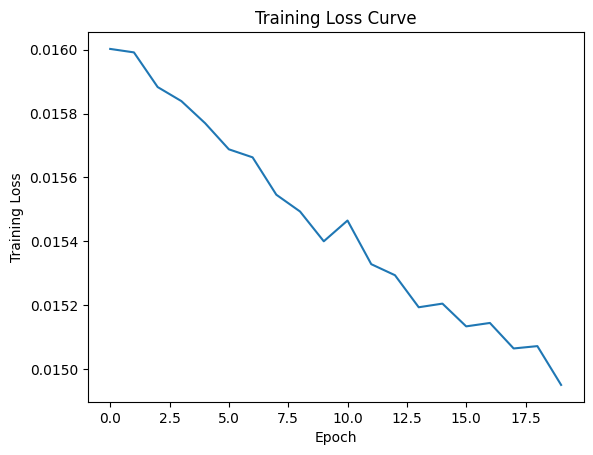

In [ ]:
# Step 5: Plot the training loss curve
plt.plot(epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.show()

**Answer:**

The requirement stipulated that the size of the latent representation should not exceed 34% of the size of the original image. To meet this criterion, I designed the CNN model with filter numbers of 16, 32, and 64 in each layer.

Initially, I set the hyperparameters to 10 epochs, a learning rate of 0.001, and a batch size of 32. However, despite these settings, the training loss remained relatively high, around 0.02. To address this, I attempted to improve performance by reducing the learning rate to 0.01 and by increasing the learnig rate to 0.0001, but these adjustments did not yield a lower training loss.

Realizing that the learning rate might not be the primary issue, I reverted it back to 0.001 and increased the number of epochs to 15. Despite extending the training duration, the training loss still did not decrease below 0.015.

Subsequently, I decided to further increase the number of epochs to 20 and later to 30. After several iterations, I finally achieved the desired training loss below 0.015 with longer training durations.

Through this experiment, I gleaned insights into the impact of the learning rate and the importance of extending training durations. I learned that excessively small learning rates can prolong convergence, and increasing the number of epochs and filter numbers in CNN models can effectively reduce the training loss.

As a result, the final model configuration comprised filter numbers of (16, 32, 64), a learning rate of 0.001, 30 epochs, and a batch size of 32. This configuration successfully met the requirement while optimizing training performance.

# Question 2: Image Reconstruction with Auto-Encoder (5 Points)

1. Select a few images from the test set and use the trained autoencoder from Question 1 to reconstruct these images.
2. Display the original and reconstructed images side by side. Discuss the quality of the reconstructions and any noticeable differences. (Try this a few times to get a better sense of the distribution of the images)

Reference

1. Implement Deep Autoencoder in PyTorch for Image Reconstructionp :
https://www.tutorialspoint.com/implement-deep-autoencoder-in-pytorch-for-image-reconstructionp

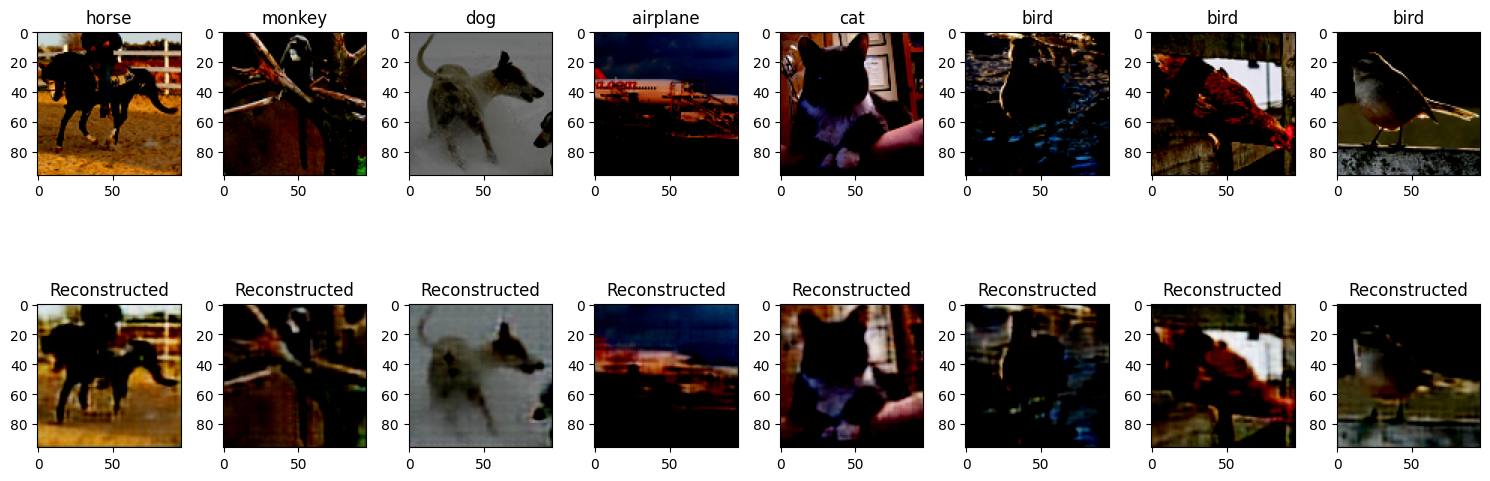

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch.utils.data

model = model.cpu()
label_names = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']

### Write your code here...

num_images = 8
images, labels = next(iter(test_loader))
test_images = images[:num_images]
test_labels = labels[:num_images]

with torch.no_grad():
  reconstructed_images = model(test_images)

ig, axes = plt.subplots(2, num_images, figsize=(15, 6))

for i in range(num_images):
    # Original image
    original_image = np.transpose(test_images[i].numpy(), (1, 2, 0))
    axes[0, i].imshow(original_image)
    axes[0, i].set_title(label_names[test_labels[i]])

    # Reconstructed image
    reconstructed_image = np.transpose(reconstructed_images[i].detach().numpy(), (1, 2, 0))
    axes[1, i].imshow(reconstructed_image)
    axes[1, i].set_title('Reconstructed')

plt.tight_layout()
plt.show()

**Answer:**

From the comparison between the original and reconstructed images, it's evident that the reconstructed images exhibit lower resolutions. This results in challenges in observing finer features, particularly in darker areas of the pictures, where the details appear blurry. One possible explanation for this phenomenon lies in the architecture of the model, particularly the inclusion of max pooling layers.

Max pooling layers are commonly employed in convolutional neural networks (CNNs) to downsample the spatial dimensions of the feature maps. This downsampling process aggregates information from local regions of the input image, effectively reducing its resolution. While downsampling can be beneficial for capturing essential features and enhancing computational efficiency, it comes at the cost of losing spatial information. Consequently, the reconstructed images produced by the autoencoder may suffer from a decrease in resolution due to the information loss incurred during the pooling operation.



# Question 3: Latent Space exploration (15 points)

1. Visualize the 2D latent space representations of the test images by reducing the dimensionality of the latent space (if necessary) using t-SNE.
2. Analyze and discuss patterns observed in the latent space. Can you identify clusters corresponding to different images?

Reference

1. AutoEncoders + tSNE : Exploratory Data Analysis on unlabeled Image Dataset : https://medium.com/@girishajmera/autoencoders-tsne-exploratory-data-analysis-on-unlabeled-image-dataset-3bdf499dbad3

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


# Your Python code goes here...

model.eval()
model.cpu()


# Extract features using the trained autoencoder
with torch.no_grad():
   features = []
   for i, (images, labels) in enumerate(test_loader): # The batches.
        # step 1.1 move data to cuda. Make sure the model is on cuda too!
        if gpu_available and use_gpu:
          images = images.cuda()
          labels = labels.cuda()

          # step2: Forward pass
        latent_representations = model.encoder(images.to('cpu')).view(images.size(0), -1).numpy()
        features.append(latent_representations)

features = np.concatenate(features, axis=0)

# Apply TSNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca')
tsne_features = tsne.fit_transform(features)

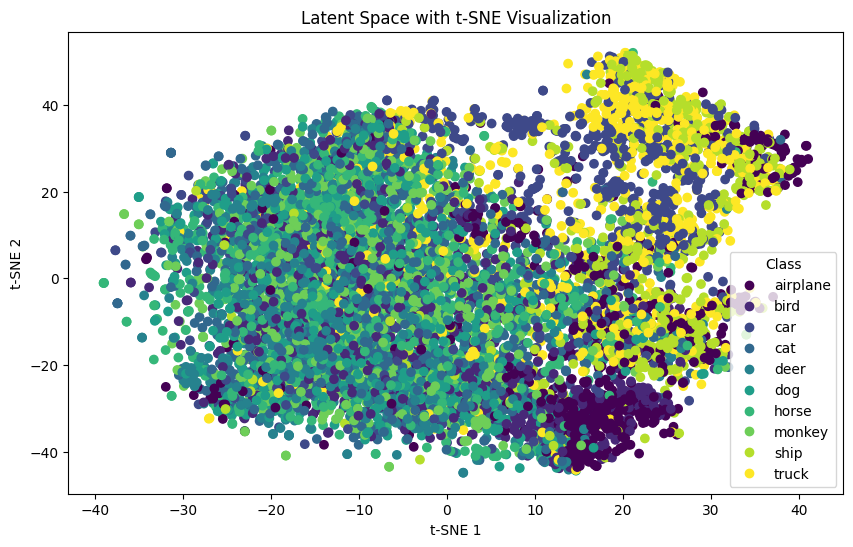

In [ ]:
# Plot the TSNE results with legend
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=test_dataset.labels, cmap='viridis')

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=label_names, title='Class')

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Latent Space with t-SNE Visualization')
# plt.colorbar(scatter, ticks=range(len(label_names)), label='Class')
plt.show()

**Answer:**

From the t-SNE plot above, it's evident that two distinct clusters emerge. Specifically, images representing vehicles such as trucks, ships, cars, and airplanes predominantly cluster in the right upper corner of the chart. Conversely, images from other classes tend to congregate in the middle of the chart.

Upon closer examination, it becomes apparent that images of airplanes and birds exhibit a tendency to be grouped together. This clustering phenomenon could be attributed to the shared characteristic of flight between these two classes, as both airplanes and birds possess wings. Consequently, during the feature extraction process in the CNN model, flying-related features such as wings might be emphasized. As a result, when performing t-SNE visualization, images from these two classes are more likely to be classified together.


# Question 4: Anomaly Detection (15 Points)

1. Conceptually describe how an autoencoder can be used for anomaly detection in a business context (e.g., fraud detection in transactions, identifying defective products in quality control).
2. Implement a simple anomaly detection system using the autoencoder from Question 1. Use the reconstruction loss to identify images from the test set that the autoencoder reconstructs poorly, considering these as anomalies.
3. Discuss how the threshold for considering an image an "anomaly" was chosen and the implications of this choice.
4. Show the 10 images in the test set that have the highest reconstruction loss. Explain what makes these images outliers/anomalies.

Reference

1. Anomaly Detection Using The Autoencoder Technique, How Does It’s Work? : https://ujangriswanto08.medium.com/anomaly-detection-using-the-autoencoder-technique-how-does-its-work-3853b13f86b6


In [ ]:
import torch
import numpy as np

### Write your code here....
model.eval()
if gpu_available and use_gpu:
    model = model.cuda()
losses = []
criterion = nn.MSELoss()

with torch.no_grad():
    for i, (images, labels) in enumerate(test_dataset): # The batches.

        if gpu_available and use_gpu:
            images = images.cuda()


        # step2: Forward pass
        outputs = model(images)

        # step 3: calculate the loss.
        loss = criterion(outputs, images)
        losses.append(loss.item())

print(len(losses))

8000


In [ ]:
# Calculate mean and standard deviation of reconstruction errors
mean_error = np.mean(losses)
std_error = np.std(losses)

# Set threshold as a certain number of standard deviations away from the mean
threshold_high = mean_error + 3 * std_error
threshold_low = mean_error - 3 * std_error

# Apply threshold to reconstruction errors
anomalies_high = np.sum(np.array(losses) > threshold_high)
anomalies_low = np.sum(np.array(losses) < threshold_low)

# Combine anomalies count
total_anomalies = anomalies_high + anomalies_low

print("Number of anomalies detected:", total_anomalies)

Number of anomalies detected: 113


In [ ]:
import matplotlib.pyplot as plt

# DO NOT EDIT THIS FUNCTION
# Plotting function that shows images given an array of losses and the indices of the images associated with those losses as found in the provided dataloader
# Notice that the provided dataloader should not shuffle. Otherwise, the results will neither be correct nor deterministic.
def plot_anomalies(data_loader, model, losses, indices, num_images=10):

    fig, axs = plt.subplots(3, num_images, figsize=(30, 15))

    for i, idx in enumerate(indices[:num_images]):

        batch_idx = idx // data_loader.batch_size
        in_batch_idx = idx % data_loader.batch_size

        for j, (images, labels) in enumerate(data_loader):
            if j == batch_idx:
                image = images[in_batch_idx]
                label = label_names[labels[in_batch_idx]]
                loss = losses[idx]
                image_ = image.numpy().transpose((1, 2, 0))

                # Plot the image
                image_ = image_ * 0.5 + 0.5
                image_ = np.clip(image_, 0, 1)
                axs[0, i].imshow(image_)
                axs[0, i].set_title(f"loss: {loss:.4f}, label: {label}")
                axs[0, i].axis('off')

                # Plot its reconstruction
                img_reconstructed = np.transpose(model(image).detach().squeeze(0).numpy(), (1, 2, 0))
                img_reconstructed = img_reconstructed * 0.5 + 0.5  # Unnormalize
                img_reconstructed = np.clip(img_reconstructed, 0, 1)
                axs[1, i].imshow(img_reconstructed)
                axs[1, i].set_title('Reconstructed')
                axs[1, i].axis('off')

                # Plot the difference (i.e. error)
                axs[2, i].imshow(np.abs(img_reconstructed - image_))
                axs[2, i].set_title('Difference')
                axs[2, i].axis('off')

                break

    plt.show()

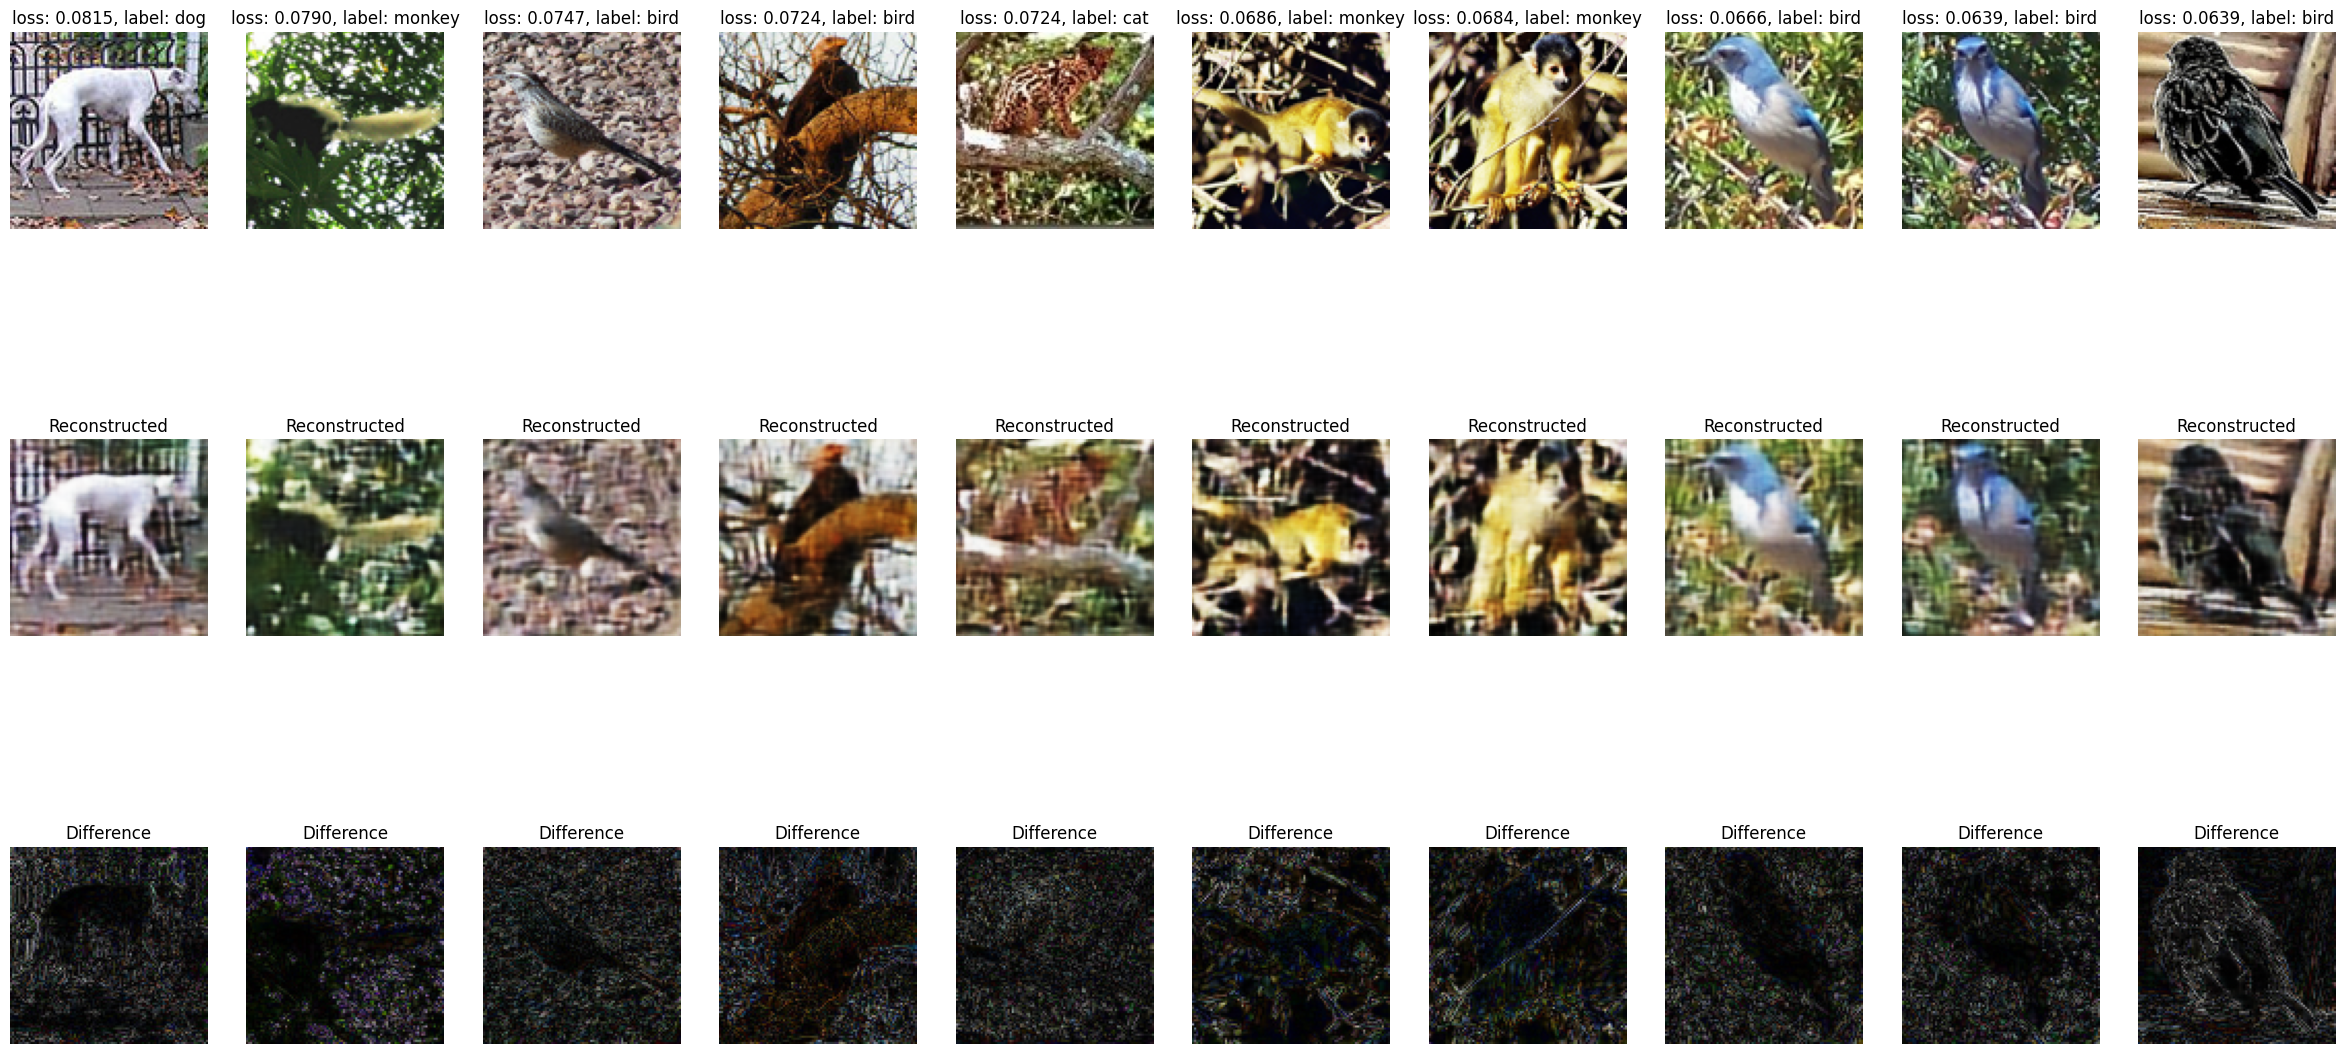

In [ ]:
# Find the indices of images with highest reconstruction losses
top_anomalies_indices = torch.argsort(torch.tensor(losses), descending=True)[:10].tolist()

# Step 4: Visualize anomalies
plot_anomalies(test_loader, model.cpu(), losses, top_anomalies_indices, num_images=10)

**Answer:**

1. Autoencoders can play a crucial role in anomaly detection within cybersecurity, particularly in the analysis of network traffic data. Specifically, they are adept at identifying anomalous patterns that may signify malicious activities, such as intrusion attempts, denial-of-service (DoS) attacks, or data exfiltration. In this context, the autoencoder is trained on a dataset comprising normal network traffic, allowing it to learn the underlying patterns and structure of legitimate communication. During training, the autoencoder encodes the input traffic data into a lower-dimensional representation and then attempts to reconstruct the original input data. Anomalies within network traffic, such as unusual patterns, unexpected traffic spikes, or abnormal communication behavior, often lead to higher reconstruction errors during the reconstruction process. By setting a threshold on the reconstruction error, cybersecurity teams can effectively identify suspicious or malicious activities within the network traffic.

2. In establishing the threshold, I chose to designate losses deviating by three standard deviations from the mean as anomalies. This decision was based on the understanding that a reconstruction loss exceeding three standard deviations signifies an occurrence outside the typical range of variation, indicative of an anomaly. By flagging these anomalies, it prompts further investigation to uncover the underlying causes and implications behind them, thus offering a comprehensive approach to anomaly detection.

3. The comparison between the original and reconstructed images highlights discrepancies, primarily in darker regions. This observation aligns with the findings from question 2. Specifically, the reconstructed images exhibit diminished resolutions, especially noticeable in areas with blurry and darker regions. Consequently, these regions display more prominent differences compared to the original images, as the model struggles to extract features effectively from darker areas. Moreover, the lower resolution may hinder the distinction of objects in these regions beyond their shape, contributing to the observed disparities. As a result, when the decoder reconstructs the images, it may inaccurately represent the features present in darker areas, leading to higher reconstruction errors.